In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import math

%matplotlib inline

In [2]:
#math functions 
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function for logistic regression
def compute_cost(X, y, w, b, *argv):
    m = X.shape[0]  
    z = np.dot(X, w) + b
    h = sigmoid(z)
    
    loss = -y * np.log(h) - (1 - y) * np.log(1 - h)
    total_cost = (1 / m) * np.sum(loss)
    
    return total_cost


# Define the gradient computation function
def compute_gradient(X, y, w, b, *args): 
    m, n = X.shape
    dj_dw = np.zeros(n)  
    dj_db = 0.           
    
    # Compute gradients for each example in the training data
    for i in range(m):
        z_wb = np.dot(X[i], w) + b
        sigmoid_z_wb = sigmoid(z_wb)
        dj_db_i = sigmoid_z_wb - y[i]
        dj_db += dj_db_i
        for j in range(n):
            dj_dw[j] += dj_db_i * X[i, j]
    dj_dw /= m
    dj_db /= m

    return dj_db, dj_dw


def compute_cost_reg(X, y, w, b, lambda_=1):
    # Compute the cost function for regularized logistic regression.
    m = X.shape[0]
    z = np.dot(X, w) + b
    h = sigmoid(z)
    loss = -y * np.log(h) - (1 - y) * np.log(1 - h)
    cost_without_reg = (1 / m) * np.sum(loss)

    reg_cost = 0.5 * lambda_ * np.sum(w**2) / m

    total_cost = cost_without_reg + reg_cost
    return total_cost


def compute_gradient_reg(X, y, w, b, lambda_=1):
    # Compute the gradient for regularized logistic regression.
    m, n = X.shape

    dj_db, dj_dw = compute_gradient(X, y, w, b)

    for j in range(n):
        dj_dw[j] += lambda_ * w[j]

    dj_db += lambda_ * b

    return dj_db, dj_dw


# Implement gradient descent
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    m = len(X)  # Number of training examples
    J_history = []  # List to store the cost history
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db
        
        # Calculate the cost and save it in the history list
        cost = cost_function(X, y, w_in, b_in)
        J_history.append(cost)
        
        # Print progress at certain intervals
        if i % math.ceil(num_iters / 10) == 0 or i == (num_iters - 1):
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

    return w_in, b_in, J_history


def predict(X, w, b):
    # Calculate the linear combination of features and parameters
    z = np.dot(X, w) + b
    
    # Apply the sigmoid function to obtain the model's predictions
    predictions = sigmoid(z)
    
    # Set predictions to 1 if sigmoid output is greater than or equal to 0.5, else set to 0
    predictions[predictions >= 0.5] = 1
    predictions[predictions < 0.5] = 0
    
    return predictions

def calculate_accuracy(y_true, y_pred):
    # Get the number of examples in the dataset
    m = len(y_true)
    
    # Count the number of correct predictions by comparing true labels to predicted labels
    correct_predictions = np.sum(y_true == y_pred)
    
    # Calculate accuracy as the proportion of correct predictions over total examples
    accuracy = correct_predictions / m
    
    return accuracy


def calculate_precision(y_true, y_pred):
    # Count the number of true positive predictions (correctly predicted positive examples)
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    
    # Count the number of predicted positive examples
    predicted_positives = np.sum(y_pred == 1)
    
    # Calculate precision as the proportion of true positive predictions over predicted positives
    precision = true_positives / predicted_positives
    
    return precision


def calculate_recall(y_true, y_pred):
    # Count the number of true positive predictions (correctly predicted positive examples)
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    
    # Count the number of actual positive examples
    actual_positives = np.sum(y_true == 1)
    
    # Calculate recall as the proportion of true positive predictions over actual positives
    recall = true_positives / actual_positives
    
    return recall


def calculate_f1_score(y_true, y_pred):
    # Calculate precision and recall using the previously defined functions
    precision = calculate_precision(y_true, y_pred)
    recall = calculate_recall(y_true, y_pred)
    
    # Calculate F1 score as the harmonic mean of precision and recall
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return f1_score

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


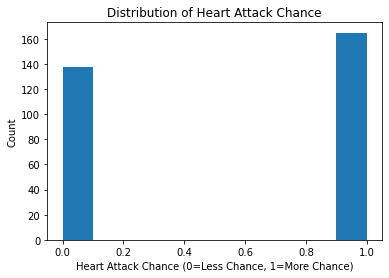

In [3]:
column_names = ["polarity", "id", "date", "query", "user", "tweet_text"]

data = pd.read_csv('heart.csv')
print(data.head())

plt.hist(data['target'])
plt.title('Distribution of Heart Attack Chance')
plt.xlabel('Heart Attack Chance (0=Less Chance, 1=More Chance)')
plt.ylabel('Count')
plt.show()

In [4]:
#checking for missing variables
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


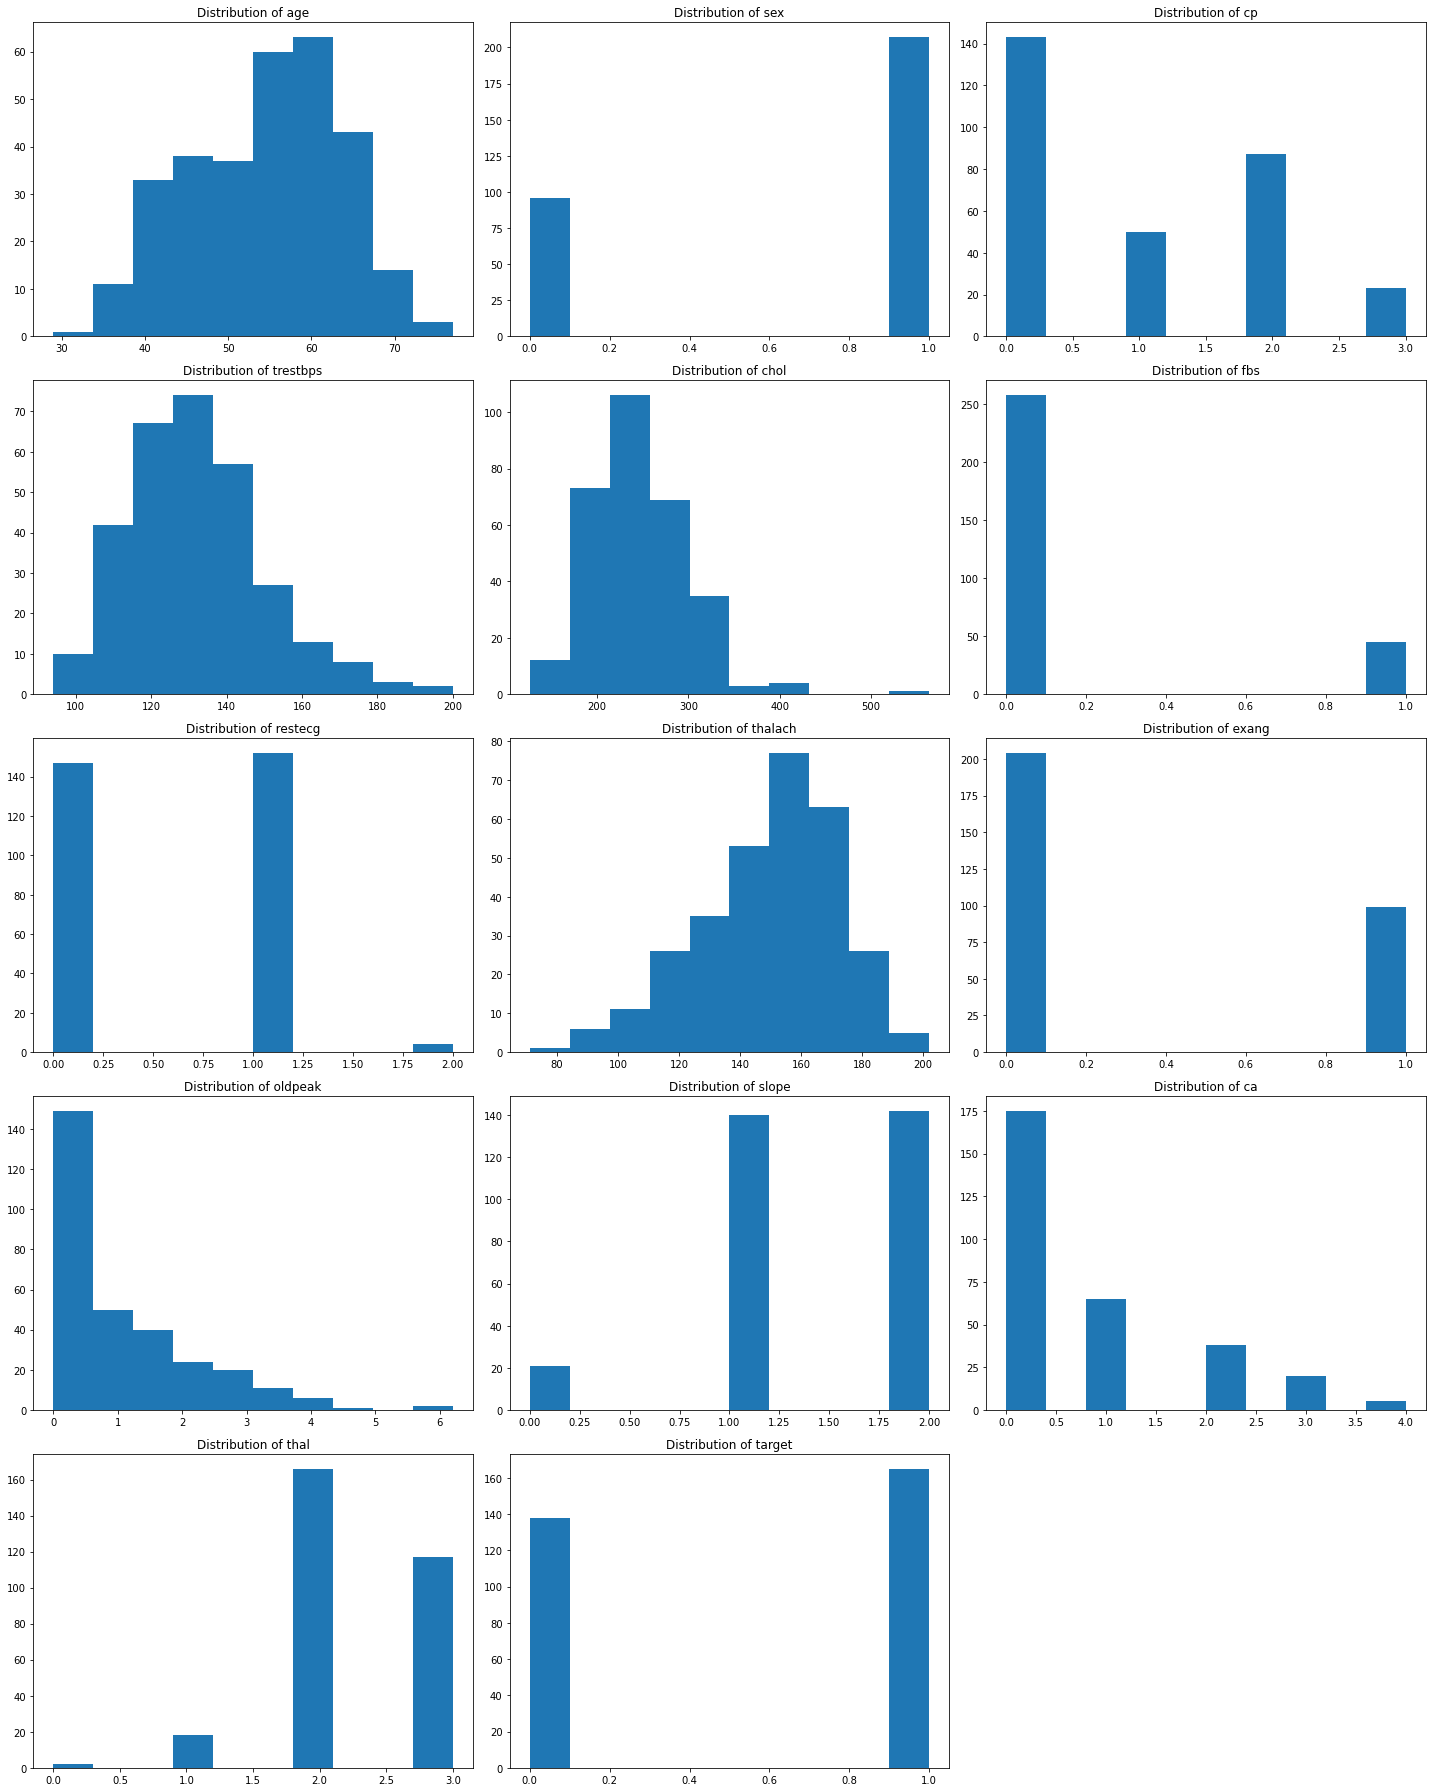

In [5]:
#showing the info if each column
plt.figure(figsize=(20, 25))
for i, column in enumerate(data.columns):
    plt.subplot(5, 3, i + 1)
    plt.hist(data[column])
    plt.title('Distribution of ' + column)
plt.tight_layout()
plt.show()

In [6]:
# Splitting data into features (X) and target variable (Y)
Y = data['target'].to_numpy()
X = data.drop(columns=['target']).to_numpy()

# Normalize the features
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

In [7]:
# Initialize the parameters
num_features = X_train.shape[1]
initial_w = np.zeros(num_features)
initial_b = 0

# Set hyperparameters
alpha = 0.01
iterations = 10000

# Train the logistic regression model
w_final, b_final, J_history = gradient_descent(X_train, Y_train, initial_w, initial_b,
                                               compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost     0.69
Iteration 1000: Cost     0.36
Iteration 2000: Cost     0.35
Iteration 3000: Cost     0.35
Iteration 4000: Cost     0.35
Iteration 5000: Cost     0.35
Iteration 6000: Cost     0.35
Iteration 7000: Cost     0.35
Iteration 8000: Cost     0.35
Iteration 9000: Cost     0.35
Iteration 9999: Cost     0.35


In [8]:
# Make predictions on the test data
Y_pred = predict(X_test, w_final, b_final)

In [9]:
accuracy = calculate_accuracy(Y_test, Y_pred)
precision = calculate_precision(Y_test, Y_pred)
recall = calculate_recall(Y_test, Y_pred)
f1_score = calculate_f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1 Score: 0.8571428571428571


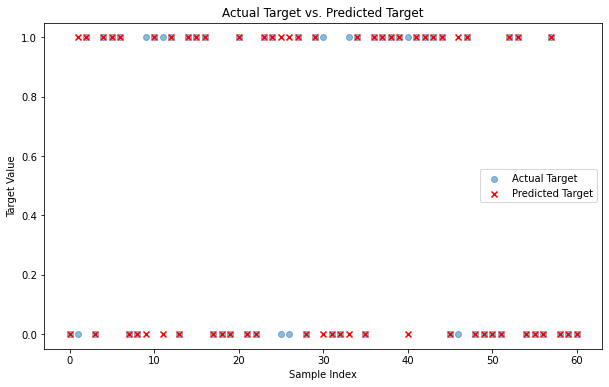

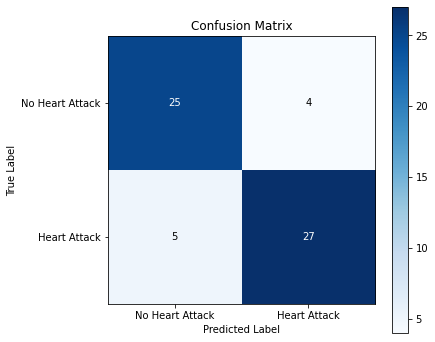

Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1 Score: 0.8571428571428571


In [10]:
# Get the predicted target values
Y_pred = predict(X_test, w_final, b_final)

# Calculate accuracy
accuracy = calculate_accuracy(Y_test, Y_pred)

# Plot the actual target values and predicted target values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test, label='Actual Target', alpha=0.5)
plt.scatter(range(len(Y_test)), Y_pred, marker='x', color='red', label='Predicted Target')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Actual Target vs. Predicted Target')
plt.legend()
plt.show()

# Plot confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Heart Attack', 'Heart Attack'])
plt.yticks(tick_marks, ['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j]), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.show()

# Print accuracy and other evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", calculate_precision(Y_test, Y_pred))
print("Recall:", calculate_recall(Y_test, Y_pred))
print("F1 Score:", calculate_f1_score(Y_test, Y_pred))